# JPL Horizons Ephemeris Plots


 <p>AstroQuery provides convenient way to produce an Ephemeris for a solar system object.  Docs are on at #https://astroquery.readthedocs.io/en/latest/ 
 </p>
 <p>Astroquery for Horizons docs are at https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html  </p>
 <p>Each cell below can be executed by selecting it and entering <b>Control-Enter</b> </p>
 


<p><b>Horizons</b> is the astro query target </p>
<p><b>obj</b> is the object returned by the Horizons web server.</p>
<p><b>eph</b> is the ephemeris associated with the query return. eph is a table of row and column values. The first line gives the column headers. </p>

<p>The ephemeris object can be saved in several formats for offline processing. </p> 
<p>Example:
<pre>
eph.write('ephem.html', format='jsviewer')
eph.write('ephem.csv', format='csv')
eph.write('ephem.txt', format='ascii')
eph.write('ephem.fits', format='fits')
eph.write('ephem.xml', format='votable')
eph.write('ephem.tex', format='latex')
</pre>
</p>

In [17]:
#https://astroquery.readthedocs.io/en/latest/
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy.time import Time
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings

warnings.filterwarnings("ignore")

desig = 'C/2021 P4'
fullname ='C/2021 P4 (ATLAS)'
startdate = '2021-06-01'
stopdate = '2023-06-01'
stepsize= '7d'
jdPerihelion = '2459790.875543786621'



obj = Horizons(id=desig, location='500',epochs={'start':startdate, 'stop':stopdate,'step':stepsize} )
eph = obj.ephemerides()
print('Horizons ephemerides for ' + fullname + ' retrieved from JPL')

Horizons ephemerides for C/2021 P4 (ATLAS) retrieved from JPL


Data arrays can be retrieved from the object ephemerides by calling the column name. 
They are astropy tables. http://docs.astropy.org/en/stable/table/index.html
<p> examples: 
    <ul> r = eph.columns[eph.index_column('r')] </ul>
</p>
<p> <ul> delta = eph.columns[eph.index_column('delta')] </ul>
</p>
<p>Data arrays can easily be plotted with matplotlib.</p>


## Plot of r and delta versus date 

<Figure size 640x480 with 0 Axes>

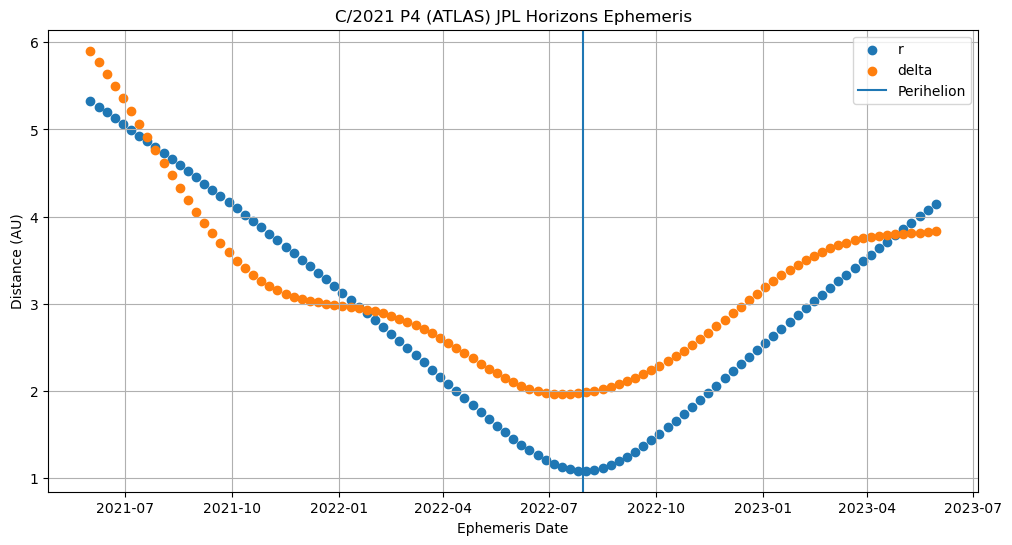

In [18]:
def getEphemerisDateTimes(jd):
    datetimes=[]
    for x in jd:
        datetimes.append(Time(x, format='jd').datetime)
    return datetimes
    

perihelion = Time(jdPerihelion, format='jd').datetime
jdvals = eph.columns[eph.index_column('datetime_jd')]
ephemerisDateTimes = getEphemerisDateTimes(jdvals)

r = eph.columns[eph.index_column('r')]
delta = eph.columns[eph.index_column('delta')]
plt.clf()
fig, ax = plt.subplots(figsize=(12, 6))

plt.title(fullname + ' JPL Horizons Ephemeris')
plt.xlabel('Ephemeris Date')
plt.ylabel('Distance (AU)')
plt.grid(True)
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.scatter(ephemerisDateTimes, r, label='r')
plt.scatter(ephemerisDateTimes, delta, label='delta')
plt.axvline(perihelion, label='Perihelion')
plt.legend(loc=0)
plt.show()


<p>In this distance plot, the value of r reaches a minimum at its perihelion date. The value of delta reaches a minimum ahead of its perihelion date. The apparent brightness depends on both distances. This comet could reach peak brightness a few weeks before its perihelion. Dust tails appear longer as they approach closest to Earth. 

<p>JPLhorizons ephemeris parameters <b>T-mag</b>  and <b>N-mag</b> are JPL's estimated total and nuclear magnitudes. This plot shows that that the comet's total magnitude is 2 to 3 magnitudes brighter than nuclear magnitude. Horizons documentation provides the method of how these quantities are calculated.</p>

https://ssd.jpl.nasa.gov/?horizons_doc#specific_quantities

<pre>
T-mag is the comet's approximate apparent total magnitud.
N-mag is the comet's nuclear magnitude by following standard IAU definitions:
    
     T-mag =  M1 + 5*log10(delta) + k1*log10(r)
     N-mag =  M2 + 5*log10(delta) + k2*log10(r) + phcof*beta
     Units: MAGNITUDES
     </pre>
   <p>beta is phase in degrees</p> 
   <p>phcof is phase coefficient</p>
 The quantities M1, M2, k1, k2, phcof are returned in the returned ephemeris in  their own columns. 
 
 

## Plot of magnitude versus date

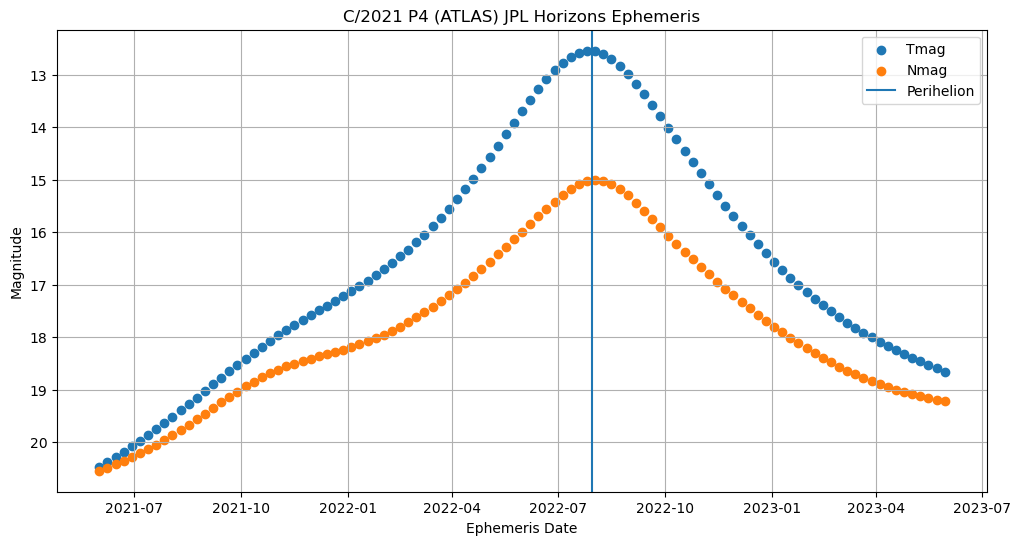

In [19]:
tmag = eph.columns[eph.index_column('Tmag')]
nmag = eph.columns[eph.index_column('Nmag')]

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(fullname +' JPL Horizons Ephemeris')
plt.xlabel('Ephemeris Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.gca().invert_yaxis()
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.scatter(ephemerisDateTimes, tmag, label='Tmag')
plt.scatter(ephemerisDateTimes, nmag, label='Nmag')
plt.axvline(perihelion, label='Perihelion')
plt.legend(loc=0)
plt.show()


From the plot, the comet is expected to brighten to 12th magnitude. The magnitude plot shows effects of distance. 

## Plot of phase versus date
Phase is the sun-comet-angle which varies with orbit geometry. The phase remains below 30 degrees. The comet orbits outside of earth's ellipse and does not pass to its interior, where high phase angles and forward scattering effects would occur.   

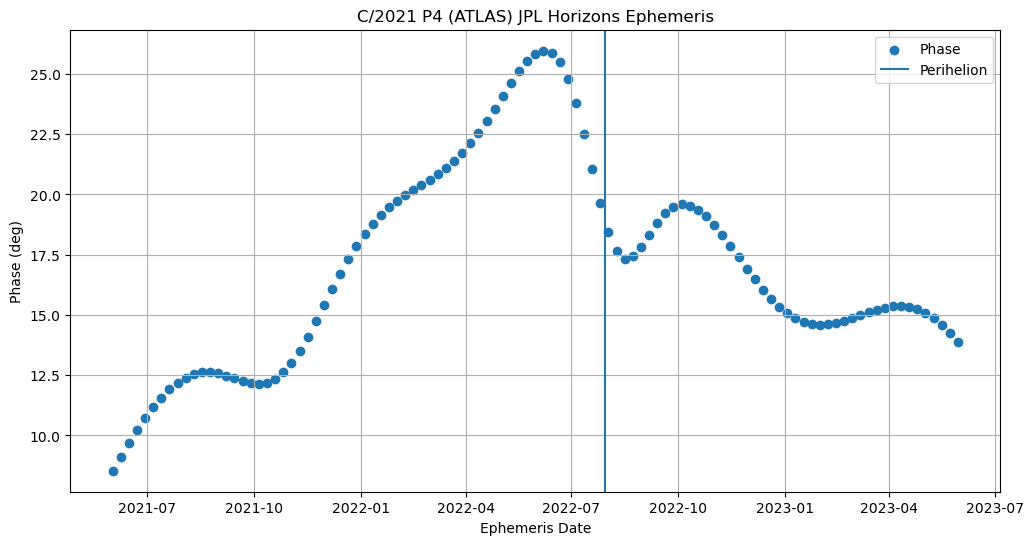

In [20]:
phase = eph.columns[eph.index_column('alpha')]

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(fullname +' JPL Horizons Ephemeris')
plt.grid(True)
plt.xlabel('Ephemeris Date')
plt.ylabel('Phase (deg)')
plt.scatter(ephemerisDateTimes, phase, label='Phase')
plt.axvline(perihelion, label='Perihelion')
plt.legend(loc=0)
plt.show()


##Plot of tail position angles <br>
'PsAng   PsAMV' =
   The position angles of the extended Sun-to-target radius vector ("PsAng")
and the negative of the targets' heliocentric velocity vector ("PsAMV"), as
seen in the observers' plane-of-sky, measured counter-clockwise (east) from
reference-frame north-pole. Primarily intended for ACTIVE COMETS, "PsAng"
is an indicator of the comets' gas-tail orientation in the sky (being in the
anti-sunward direction) while "PsAMV" is an indicator of dust-tail orientation.
Units: DEGREES

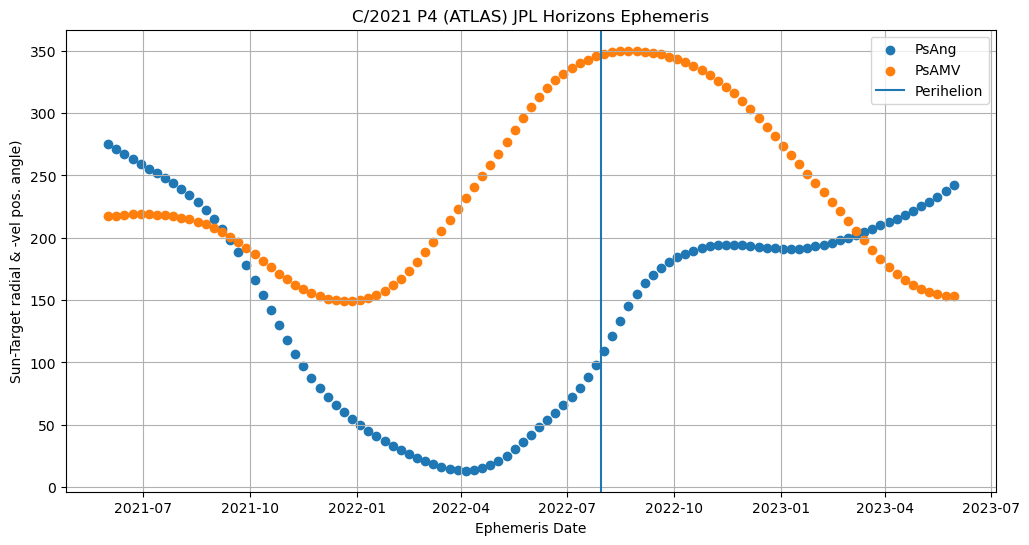

In [21]:
psang = eph.columns[eph.index_column('sunTargetPA')]
psamv = eph.columns[eph.index_column('velocityPA')]

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(fullname +' JPL Horizons Ephemeris')
plt.grid(True)
plt.xlabel('Ephemeris Date')
plt.ylabel('Sun-Target radial & -vel pos. angle)')
plt.scatter(ephemerisDateTimes, psang, label='PsAng')
plt.scatter(ephemerisDateTimes, psamv, label='PsAMV')
plt.axvline(perihelion, label='Perihelion')
plt.legend(loc=0)
plt.show()


## Plot of orbit plane angle versus date
 
PlAng: Angle between observer and target orbital plane, measured from center of target at the moment light seen at observation time leaves the target. Positive values indicate observer is above the objects' orbital plane, in the direction of reference-frame +z axis.  Units: DEGREES<br>

When plane angle approaches zero, earth gets close to the comet's orbit plane and the comet's dust tail is edge on and thin.


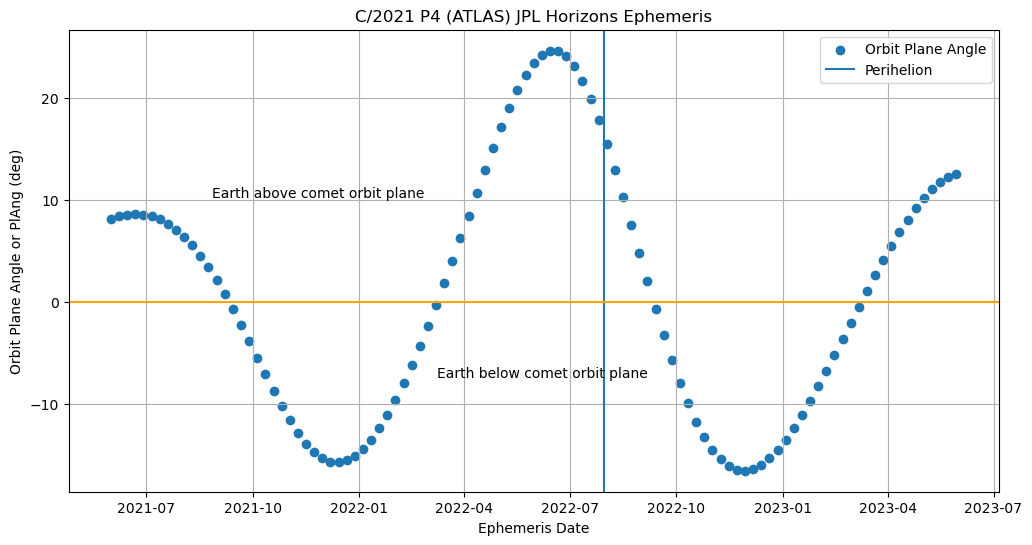

In [22]:
plang = eph.columns[eph.index_column('OrbPlaneAng')]
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(fullname +' JPL Horizons Ephemeris')
plt.grid(True)
plt.xlabel('Ephemeris Date')
plt.ylabel('Orbit Plane Angle or PlAng (deg)')
plt.scatter(ephemerisDateTimes, plang, label='Orbit Plane Angle')
plt.axvline(perihelion, label='Perihelion')
plt.axhline(0, c='orange')
plt.figtext(0.333,  0.6, 'Earth above comet orbit plane', ha='center')
plt.figtext(0.52,  0.3, 'Earth below comet orbit plane', ha='center')



plt.legend(loc=0)
plt.show()


## Plot of True Anomaly versus Date

Apparent true anomaly angle of the targets' heliocentric orbit position.
The angle in the targets' instantaneous orbit plane from the orbital periapse
direction to the target, measured positively in the direction of motion. For a comet approaching perihelion, true anomaly apparoaches 360 degrees. True anomaly is zero at perihelion.

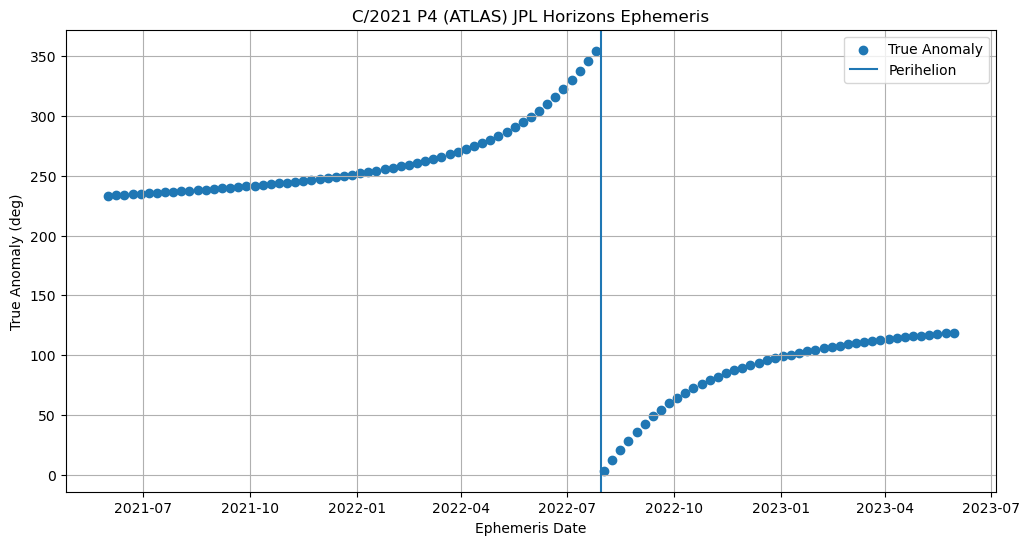

In [23]:
trueanomaly = eph.columns[eph.index_column('true_anom')]

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(fullname +' JPL Horizons Ephemeris')
plt.grid(True)
plt.xlabel('Ephemeris Date')
plt.ylabel('True Anomaly (deg)')
plt.scatter(ephemerisDateTimes, trueanomaly, label='True Anomaly')
plt.axvline(perihelion, label='Perihelion')
plt.legend(loc=0)
plt.show()


## Plot of Sky Positions 

The color bar maps comet magnitude to sky position. <br>
Dark blue corresponds to fainter and more distant. <br>
Light yellow corresponds to sky position when the comet is closer to perihelion. <br>
Sky positions loop around when the comet is distant. <br>

In [24]:
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body
import datetime

ecllon=[]
ecllat = []
ecllonhr=[]
t = Time("2022-01-01 00:00")
loc = EarthLocation.of_site('greenwich') 
with solar_system_ephemeris.set('builtin'):
    while (t < Time("2023-01-01 00:00")):
        sun = get_body('sun', t, loc)
        # print(sun) 
        rasund= sun.ra.deg
        rasundhr=rasund/15
        decsund= sun.dec.deg
        # print(rasund, decsund, t)
        ecllon.append(rasund)
        ecllonhr.append(rasundhr)
        ecllat.append(decsund)
        t += datetime.timedelta(days=7)


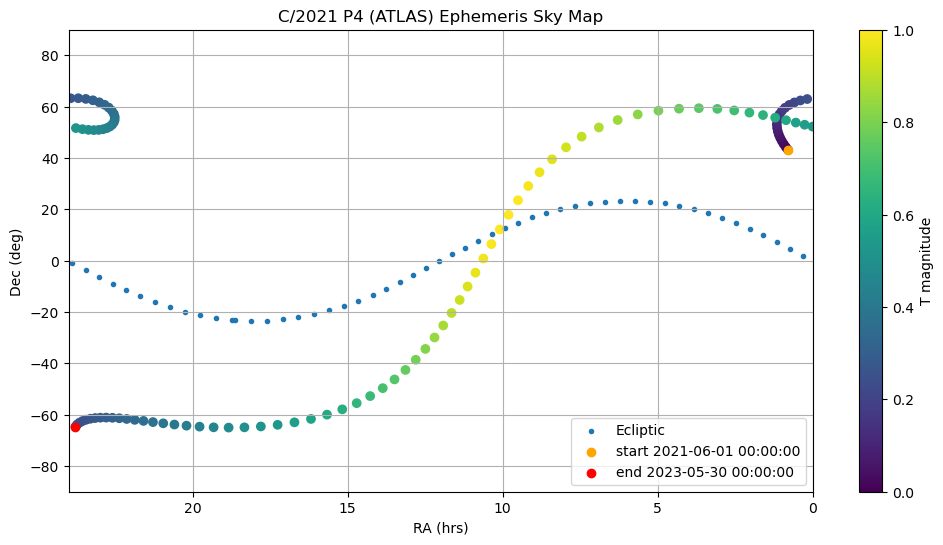

In [25]:
ra = eph.columns[eph.index_column('RA')]
rahrs = eph.columns[eph.index_column('RA')]/15
dec = eph.columns[eph.index_column('DEC')]
# Plot sky coordinates RA and Dec from ephemeris

fig, ax = plt.subplots(figsize=(12, 6))
# invert RA axis since RA increases toward the east 
plt.title(fullname +' Ephemeris Sky Map')
plt.grid(True)
plt.xlabel('RA (hrs)')
plt.ylabel('Dec (deg)')
plt.scatter(rahrs, dec, c=tmag, cmap = 'viridis_r')
plt.scatter(ecllonhr, ecllat, marker='.',  label='Ecliptic')
plt.scatter(rahrs[0], dec[0], marker='o', c='orange', label='start ' + str(ephemerisDateTimes[0]))
plt.scatter(rahrs[-1], dec[-1], marker='o', c='red', label='end ' + str(ephemerisDateTimes[-1]))

plt.colorbar(label='T magnitude')

plt.axis([0, 24, -90, 90])
plt.gca().invert_xaxis()
plt.legend(loc=0)

plt.show()
